In [1]:
import pandas as pd
from tkinter import filedialog
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://github.com/XiaoyuDeng/binder-framework/blob/master/Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv?raw=true')

In [4]:
numcomp = df.groupby('Company Name').count()
numqueen = df[df['City']=='Queens'].shape[0]
numemail = df['company email'].str.split('@').str[1].dropna().count()

In [5]:
nta = (df.groupby('NTA').count()['Company Name']>=5).to_frame()
ntalst = [i for i in nta.index.tolist() if nta.loc[i]['Company Name']==True]

In [6]:
jobcol = 'Current fulltime'

df_filter = df.loc[df['NTA'].isin(ntalst)]
df_saving = df_filter.groupby('NTA')['Total Savings'].mean().reset_index()
df_job = df_filter.groupby('NTA')[jobcol].sum().reset_index()
df_merge = pd.merge(df_job, df_saving)

df_merge.to_csv('out.csv')

Text(0, 0.5, 'Avg Saving')

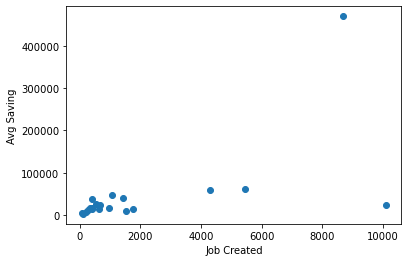

In [10]:
plt.scatter(x = df_merge[jobcol],y = df_merge['Total Savings'])
plt.xlabel('Job Created')
plt.ylabel('Avg Saving')

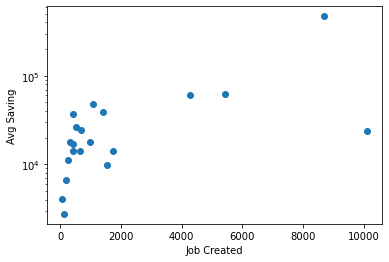

In [7]:
plt.scatter(x = df_merge[jobcol],y = df_merge['Total Savings'])
plt.xlabel('Job Created')
plt.ylabel('Avg Saving')
plt.yscale('log')


Text(0.5, 0, 'Avg Total Saving')

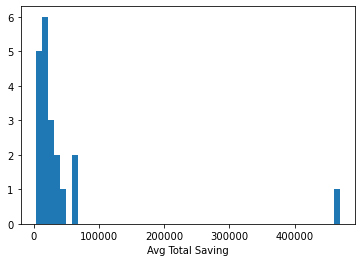

In [8]:
plt.hist(df_saving['Total Savings'],bins = 50)
plt.xlabel('Avg Total Saving')


Text(0, 0.5, 'Job Created')

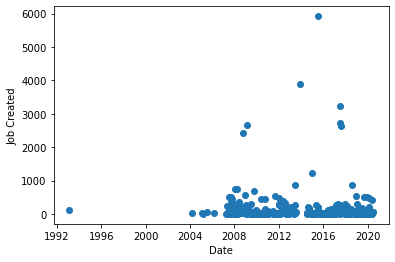

In [9]:
df['Effective Date'] = pd.to_datetime(df['Effective Date'])
df_date = df.groupby('Effective Date')[jobcol].sum().reset_index()
plt.plot_date(df_date['Effective Date'], df_date[jobcol])
plt.xlabel('Date')
plt.ylabel('Job Created')
